In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Mission n° 1
Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

In [143]:
# Télécharger les datasets
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')
customers = pd.read_csv('customers.csv')

# Nettoyage table transactions

In [144]:
# Voir les valeurs uniques
transactions['date'].unique()
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [145]:
# Séparer les valeurs derrière l'heure 
date = transactions["date"].str.split(".", n = 1, expand = True).rename(columns={0: 'date1'})[['date1']]

In [146]:
# Concaténation et renommer les colonnes
transactions1 = pd.concat([transactions, date], axis=1).drop(['date'], axis=1).rename(columns={'date1':'date'})
transactions1

,id_prod,session_id,client_id,date
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28
1,2_226,s_159142,c_277,2022-02-03 01:55:53
2,1_374,s_94290,c_4270,2021-09-23 15:13:46
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25
...,...,...,...,...
337011,1_671,s_40720,c_3454,2021-05-28 12:35:46
337012,0_759,s_50568,c_6268,2021-06-19 00:19:23
337013,0_1256,s_7219,c_4137,2021-03-16 17:31:59
337014,2_227,s_112349,c_5,2021-10-30 16:50:15


In [147]:
# Création colonne datetime
date_heure = transactions1["date"].str.split(" ", n = 1, expand = True).rename(columns={0: 'datetime', 1:'heure'})
transactions1 = pd.concat([transactions1, date_heure], axis = 1)

In [148]:
# Réstriction test_2021-03-01 02:30:02
transactions1[transactions1['date'] == 'test_2021-03-01 02:30:02']

,id_prod,session_id,client_id,date,datetime,heure
1431,T_0,s_0,ct_1,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
2365,T_0,s_0,ct_1,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
2895,T_0,s_0,ct_1,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
5955,T_0,s_0,ct_0,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
7283,T_0,s_0,ct_1,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
...,...,...,...,...,...,...
332594,T_0,s_0,ct_0,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
332705,T_0,s_0,ct_1,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
332730,T_0,s_0,ct_1,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02
333442,T_0,s_0,ct_1,test_2021-03-01 02:30:02,test_2021-03-01,02:30:02


In [149]:
#Supprimer les valeurs tests du dataset
transactions2 = transactions1[transactions1['date'] != 'test_2021-03-01 02:30:02']
transactions2[transactions2['date']== 'test_2021-03-01 02:30:02']

,id_prod,session_id,client_id,date,datetime,heure


In [150]:
# Convertir colonne en datetime
transactions2['date'] = pd.to_datetime(transactions2['date'])
transactions2['datetime'] = pd.to_datetime(transactions2['datetime'])

In [151]:
#Créations colonnes (année, mois, jour, jour de la semaine, heure)

time = transactions2['date'].iloc[0]

transactions2['annee']= transactions2['date'].apply(lambda time : time.year)
transactions2['mois']= transactions2['date'].apply(lambda time : time.month)
transactions2['jour']= transactions2['date'].apply(lambda time : time.day)
transactions2['jour_semaine']= transactions2['date'].apply(lambda time : time.dayofweek)
transactions2['heure']= transactions2['date'].apply(lambda time : time.hour)

dayofweek = {0:'lundi', 1:'mardi', 2:'mercredi', 3:'jeudi', 4:'vendredi', 5:'samedi', 6:'dimanche'}
transactions2['jour_semaine'] = transactions2['jour_semaine'].map(dayofweek)
transactions2

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28,2021-04-10,18,2021,4,10,samedi
1,2_226,s_159142,c_277,2022-02-03 01:55:53,2022-02-03,1,2022,2,3,jeudi
2,1_374,s_94290,c_4270,2021-09-23 15:13:46,2021-09-23,15,2021,9,23,jeudi
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17,3,2021,10,17,dimanche
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25,2021-07-17,20,2021,7,17,samedi
...,...,...,...,...,...,...,...,...,...,...
337011,1_671,s_40720,c_3454,2021-05-28 12:35:46,2021-05-28,12,2021,5,28,vendredi
337012,0_759,s_50568,c_6268,2021-06-19 00:19:23,2021-06-19,0,2021,6,19,samedi
337013,0_1256,s_7219,c_4137,2021-03-16 17:31:59,2021-03-16,17,2021,3,16,mardi
337014,2_227,s_112349,c_5,2021-10-30 16:50:15,2021-10-30,16,2021,10,30,samedi


In [152]:
# Voir si il y a des valeur valeurs manquantes
transactions2.isna().sum()/transactions2.shape[0]

id_prod         0.0
session_id      0.0
client_id       0.0
date            0.0
datetime        0.0
heure           0.0
annee           0.0
mois            0.0
jour            0.0
jour_semaine    0.0
dtype: float64

Text(0.5, 1.0, "La fréquence d'achats sur les 12 mois")

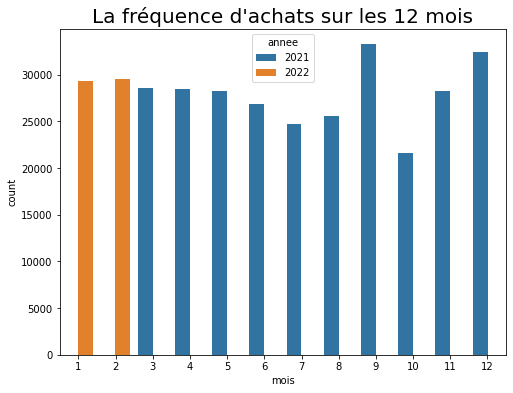

In [153]:
# fréquences achats sur les 12 mois 
plt.figure(figsize=(8,6))
sns.countplot(x = 'mois',data= transactions2, hue='annee' )
plt.title("La fréquence d'achats sur les 12 mois", size=20)

In [154]:
# Création colonne bool pour voir si il y a des doublons
transactions2["is_duplicate"]= transactions2.duplicated()
transactions2[transactions2['is_duplicate']==True]
transactions2 = transactions2.drop(['is_duplicate'], axis=1)
transactions2

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28,2021-04-10,18,2021,4,10,samedi
1,2_226,s_159142,c_277,2022-02-03 01:55:53,2022-02-03,1,2022,2,3,jeudi
2,1_374,s_94290,c_4270,2021-09-23 15:13:46,2021-09-23,15,2021,9,23,jeudi
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17,3,2021,10,17,dimanche
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25,2021-07-17,20,2021,7,17,samedi
...,...,...,...,...,...,...,...,...,...,...
337011,1_671,s_40720,c_3454,2021-05-28 12:35:46,2021-05-28,12,2021,5,28,vendredi
337012,0_759,s_50568,c_6268,2021-06-19 00:19:23,2021-06-19,0,2021,6,19,samedi
337013,0_1256,s_7219,c_4137,2021-03-16 17:31:59,2021-03-16,17,2021,3,16,mardi
337014,2_227,s_112349,c_5,2021-10-30 16:50:15,2021-10-30,16,2021,10,30,samedi


# Nettoyage table customers

In [155]:
# Supprimer les clients ct_1 et ct_0
customers1 = customers[~customers['client_id'].isin(['ct_1', 'ct_0'])]
customers1.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [156]:
# Encodage variable sex
customers1['sex_binaire']= customers1['sex'].map({'f':0, 'm': 1})

In [157]:
# Voir si il y a des valeurs manquantes 
customers1.isna().sum()/customers1.shape[0]

client_id      0.0
sex            0.0
birth          0.0
sex_binaire    0.0
dtype: float64

In [158]:
# Création colonne bool pour voir si il y a des doublons
customers1["is_duplicate"]= customers1.duplicated()
customers1[customers1['is_duplicate']==True]

,client_id,sex,birth,sex_binaire,is_duplicate


In [159]:
# Effacer colonne bool
customers1 = customers1.drop(['is_duplicate'], axis=1)

# Nettoyage table products

In [160]:
# Supprimer prix inférieur à 0 (outlier aberrant)
products[products['price']<0]
products1 = products[products['price']!= -1.0]
products1.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [161]:
# voir les valeurs manquantes 
products1.isna().sum()/products1.shape[0]

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [162]:
# voir les catégories les plus fréquentes 
products1['categ'].value_counts(normalize=True)

0    0.702374
1    0.224893
2    0.072733
Name: categ, dtype: float64

In [163]:
# Création colonne bool pour voir si il y a doublons
products1["is_duplicate"]= products1.duplicated()
products1["is_duplicate"].unique()

array([False])

In [164]:
# Création colonne object pour les catégories

products1['categ_object'] = products1['categ'].replace({0: 'categ0', 1:'categ1', 2:'categ2'})
products1.head()

,id_prod,price,categ,is_duplicate,categ_object
0,0_1421,19.99,0,False,categ0
1,0_1368,5.13,0,False,categ0
2,0_731,17.99,0,False,categ0
3,1_587,4.99,1,False,categ1
4,0_1507,3.99,0,False,categ0


In [165]:
#Arrondir à 2 chiffres aprés la virgule

products1['price'] =products1['price'].round(2)

In [166]:
#Effacer colonne bool de la table products1
products1 = products1.drop(['is_duplicate'], axis=1)


In [167]:
#merge entre transactions2 et products1
data = transactions2.merge(products1,on='id_prod', how='left') 
data.head()

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine,price,categ,categ_object
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28,2021-04-10,18,2021,4,10,samedi,4.99,0.0,categ0
1,2_226,s_159142,c_277,2022-02-03 01:55:53,2022-02-03,1,2022,2,3,jeudi,65.75,2.0,categ2
2,1_374,s_94290,c_4270,2021-09-23 15:13:46,2021-09-23,15,2021,9,23,jeudi,10.71,1.0,categ1
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17,3,2021,10,17,dimanche,4.20,0.0,categ0
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25,2021-07-17,20,2021,7,17,samedi,8.99,0.0,categ0


In [168]:
#il n'y a pas de doublons
data["is_duplicate"]= data.duplicated()
data['is_duplicate'].unique()

array([False])

In [187]:
#Le produit 0_2245 est sur la transaction mais n'est pas référencé sur la table produit 
data[data['id_prod']=='0_2245']

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine,price,categ,categ_object,is_duplicate
6231,0_2245,s_49705,c_1533,2021-06-17 03:03:12,2021-06-17,3,2021,6,17,jeudi,NaN,NaN,NaN,False
10797,0_2245,s_49323,c_7954,2021-06-16 05:53:01,2021-06-16,5,2021,6,16,mercredi,NaN,NaN,NaN,False
14045,0_2245,s_124474,c_5120,2021-11-24 17:35:59,2021-11-24,17,2021,11,24,mercredi,NaN,NaN,NaN,False
17480,0_2245,s_172304,c_4964,2022-02-28 18:08:49,2022-02-28,18,2022,2,28,lundi,NaN,NaN,NaN,False
21071,0_2245,s_3,c_580,2021-03-01 00:09:29,2021-03-01,0,2021,3,1,lundi,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322523,0_2245,s_16936,c_4167,2021-04-06 19:59:19,2021-04-06,19,2021,4,6,mardi,NaN,NaN,NaN,False
329226,0_2245,s_13738,c_7790,2021-03-30 23:29:02,2021-03-30,23,2021,3,30,mardi,NaN,NaN,NaN,False
330297,0_2245,s_128815,c_6189,2021-12-03 14:14:40,2021-12-03,14,2021,12,3,vendredi,NaN,NaN,NaN,False
335331,0_2245,s_26624,c_1595,2021-04-27 18:58:47,2021-04-27,18,2021,4,27,mardi,NaN,NaN,NaN,False


In [171]:
# Vérifier les valeurs manquantes
data.isna().sum()/data.shape[0]

id_prod         0.000000
session_id      0.000000
client_id       0.000000
date            0.000000
datetime        0.000000
heure           0.000000
annee           0.000000
mois            0.000000
jour            0.000000
jour_semaine    0.000000
price           0.000306
categ           0.000306
categ_object    0.000306
is_duplicate    0.000000
dtype: float64

In [172]:
# Supprimer valeurs Nan (produit 0_2245 outliers aberrantes )
data1 = data.dropna()
# Vérification supprimer valeurs Nan
data1.isna().sum()/data1.shape[0]

id_prod         0.0
session_id      0.0
client_id       0.0
date            0.0
datetime        0.0
heure           0.0
annee           0.0
mois            0.0
jour            0.0
jour_semaine    0.0
price           0.0
categ           0.0
categ_object    0.0
is_duplicate    0.0
dtype: float64

In [173]:
# merge entre la table customer1 et data1
data_final = data1.merge(customers1, on='client_id', how='left')
data_final1 = data_final.drop(['is_duplicate'], axis=1)
data_final1.head()

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine,price,categ,categ_object,sex,birth,sex_binaire
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28,2021-04-10,18,2021,4,10,samedi,4.99,0.0,categ0,f,1977,0
1,2_226,s_159142,c_277,2022-02-03 01:55:53,2022-02-03,1,2022,2,3,jeudi,65.75,2.0,categ2,f,2000,0
2,1_374,s_94290,c_4270,2021-09-23 15:13:46,2021-09-23,15,2021,9,23,jeudi,10.71,1.0,categ1,f,1979,0
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17,3,2021,10,17,dimanche,4.20,0.0,categ0,m,1963,1
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25,2021-07-17,20,2021,7,17,samedi,8.99,0.0,categ0,f,1980,0


In [174]:
# Création colonne age
data_final1['age'] = data_final1['annee']- data_final1['birth']
data_final1.head()

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine,price,categ,categ_object,sex,birth,sex_binaire,age
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28,2021-04-10,18,2021,4,10,samedi,4.99,0.0,categ0,f,1977,0,44
1,2_226,s_159142,c_277,2022-02-03 01:55:53,2022-02-03,1,2022,2,3,jeudi,65.75,2.0,categ2,f,2000,0,22
2,1_374,s_94290,c_4270,2021-09-23 15:13:46,2021-09-23,15,2021,9,23,jeudi,10.71,1.0,categ1,f,1979,0,42
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17,3,2021,10,17,dimanche,4.20,0.0,categ0,m,1963,1,58
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25,2021-07-17,20,2021,7,17,samedi,8.99,0.0,categ0,f,1980,0,41


In [175]:
# Convertion colonne categ en int
data_final1['categ'] = data_final1['categ'].astype('int')

In [176]:
# Création colonne mois_object
data_final1['mois_object']= data_final1['mois'].replace({1: 'janvier', 2:'février', 3:'mars', 4:'avril', 5:'mai', 6:'juin', 7:'juillet', 8:'aout', 9:'septembre', 10:'octobre', 11:'novembre', 12:'décembre'})

In [177]:
#création colonne tranche age 
data_final1['tranche_age'] = pd.cut(data_final1['age'], bins=[16,30,50,93], labels=['17-30 ans ', '30-50 ans ', '50-93ans'])


In [178]:
# Voir les valeurs manquantes
data_final1.isna().sum()/data1.shape[0]

id_prod         0.0
session_id      0.0
client_id       0.0
date            0.0
datetime        0.0
heure           0.0
annee           0.0
mois            0.0
jour            0.0
jour_semaine    0.0
price           0.0
categ           0.0
categ_object    0.0
sex             0.0
birth           0.0
sex_binaire     0.0
age             0.0
mois_object     0.0
tranche_age     0.0
dtype: float64

In [179]:
# Détection des clients outliers atypiques 

outlier_atypique = data_final1.groupby('client_id').sum()
outlier_atypique[['price']].sort_values(by='price',ascending=False).head(10)

,price
client_id,
c_1609,162007.34
c_4958,144257.21
c_6714,73197.34
c_3454,54442.92
c_7959,2564.25
c_4491,2540.53
c_8026,2537.67
c_2140,2527.01
c_8392,2515.98


In [180]:
#Création sous échantillon sans les clients outliers atypiques pour les mesures tendances centrales car moyenne sensible 
data_final2 = data_final1[~data_final1['client_id'].isin(['c_1609', 'c_4958', 'c_6714', 'c_3454'])]
data_final2

,id_prod,session_id,client_id,date,datetime,heure,annee,mois,jour,jour_semaine,price,categ,categ_object,sex,birth,sex_binaire,age,mois_object,tranche_age
0,0_1483,s_18746,c_4450,2021-04-10 18:37:28,2021-04-10,18,2021,4,10,samedi,4.99,0,categ0,f,1977,0,44,avril,30-50 ans
1,2_226,s_159142,c_277,2022-02-03 01:55:53,2022-02-03,1,2022,2,3,jeudi,65.75,2,categ2,f,2000,0,22,février,17-30 ans
2,1_374,s_94290,c_4270,2021-09-23 15:13:46,2021-09-23,15,2021,9,23,jeudi,10.71,1,categ1,f,1979,0,42,septembre,30-50 ans
3,0_2186,s_105936,c_4597,2021-10-17 03:27:18,2021-10-17,3,2021,10,17,dimanche,4.20,0,categ0,m,1963,1,58,octobre,50-93ans
4,0_1351,s_63642,c_1242,2021-07-17 20:34:25,2021-07-17,20,2021,7,17,samedi,8.99,0,categ0,f,1980,0,41,juillet,30-50 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336706,0_1475,s_65686,c_5607,2021-07-22 13:47:39,2021-07-22,13,2021,7,22,jeudi,11.99,0,categ0,m,1950,1,71,juillet,50-93ans
336707,1_498,s_159138,c_1857,2022-02-03 01:39:15,2022-02-03,1,2022,2,3,jeudi,23.37,1,categ1,f,1990,0,32,février,30-50 ans
336709,0_759,s_50568,c_6268,2021-06-19 00:19:23,2021-06-19,0,2021,6,19,samedi,22.99,0,categ0,m,1991,1,30,juin,17-30 ans
336710,0_1256,s_7219,c_4137,2021-03-16 17:31:59,2021-03-16,17,2021,3,16,mardi,11.03,0,categ0,f,1968,0,53,mars,50-93ans


In [181]:
data_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336712
Data columns (total 19 columns):
id_prod         336713 non-null object
session_id      336713 non-null object
client_id       336713 non-null object
date            336713 non-null datetime64[ns]
datetime        336713 non-null datetime64[ns]
heure           336713 non-null int64
annee           336713 non-null int64
mois            336713 non-null int64
jour            336713 non-null int64
jour_semaine    336713 non-null object
price           336713 non-null float64
categ           336713 non-null int64
categ_object    336713 non-null object
sex             336713 non-null object
birth           336713 non-null int64
sex_binaire     336713 non-null int64
age             336713 non-null int64
mois_object     336713 non-null object
tranche_age     336713 non-null category
dtypes: category(1), datetime64[ns](2), float64(1), int64(8), object(7)
memory usage: 49.1+ MB


In [182]:
# Sauvegarder table data_final1 (avec clients outliers atypiques)
data_final1.to_csv('data_final1.csv', index=False)

# Sauvegarder table data_final2 (sans les clients outliers atypiques)
data_final2.to_csv('data_final2.csv', index=False)